# Introduction

Bull and Bear market conditions apply to stock markets such as the S&P 500 or NASDAQ. In summary, the market will be in one of the two conditions. A market with upward trending prices is referred to as a “Bull” market. Typically, a Bull market lasts for an extended period, often years. However, the market can switch to a downward trending market with typical periods ranging from as short as a month to over a year and termed a “Bear” market condition.

Understanding and analyzing market cycles helps investors gain insight into familiar patterns, market conditions, influences on the market, and helps investors to plan investment strategies. In this article, two software tools are introduced for analyzing market cycles in the Python computer language. The fmcycles() function receives as input stock market data, such as S&P 500 daily close price, then retroactively analyzes it and marks the corresponding market dates as corresponding to Bull or Bear market conditions.

In [ ]:
# Initialization and Data Import

In [ ]:
!pip install yfinance --quiet

     |████████████████████████████████| 62 kB 984 kB/s 


In [ ]:
!pip install fredapi --quiet

In [ ]:
!pip install --upgrade quandl --quiet

As with a typical data analysis, we begin by importing packages and modules. Since fmcycle.py and fmplot.py are not yet available within a Python package, it is required to download them and put them into a directory contained in the PYTHONPATH. Downloading the modules into the Jupyter or Python working directory is typically the most straightforward approach.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
from datetime import timedelta as td
%run fmget
%run fmtransforms
%run fmplot
%run fmcycle

Next, we import the S&P500 data by downloading the symbol “^GSPC” from Yahoo finance and save it in the “data” directory (./data relative to the python working directory). For this, the market data begins on 1950-01-03 and ends on 2022-11-08.

In [ ]:
# Read in S&P 500 Data
dfsp500 = pd.read_csv('/content/GSPC_1950-1-3_to_2022-10-25.csv',index_col=0,parse_dates=True)
display(dfsp500.head(2))
display(dfsp500.tail(2))

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1950-01-03,16.66,16.66,16.66,16.66,16.66,1260000
1950-01-04,16.85,16.85,16.85,16.85,16.85,1890000


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-24,3762.010010,3810.739990,3741.649902,3797.340088,3797.340088,4747930000
2022-10-25,3799.439941,3862.850098,3799.439941,3859.110107,3859.110107,4843120000


# Analyze, Save, and Load the Market Cycles

The fmcycle.py module contains the fmcycles() function and it receives as input the dfsp500 dataframe. When compute = 1 the market data is analyzed and the function returns the detailed (“daily”) market cycle dataframe dfmc and summary market cycle dataframe dfmcsummary. Each dataframe is automatically saved to a csv file. If compute = 0 then fmcycles() expects to receive filenames to import the detailed and summary market cycle datafames and in this case does not analyze the input dataframe.

The three key parameters used for analyzing the daily market data are mcdown_p, mcup_p, and variable, defined as follows:

  - mcdown_p = the percent decline from market high determining a Bear market condition, default = 0.20.
  - mcup_p = the percent increase from market low determining a Bull market, default = 0.205.
  - variable = the name of the variable contained in the input data frame, df, to analyze, by default = Close

It is possible to set mcdown_p and mcup_p to other cycles, such as 10% corrections, rather than the 20% Bull and Bear conditions. Furthermore, it is also entirely possible to analyze the up and down cyclic performance of any security in this manner other than the ^GSPC. For long term evaluation of an Equity, instead of a market index, the correct variable for analysis will be Adj Close.

In [ ]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [ ]:
f_dfmc="/content/data/GSPC_dfmc2020.5_1950_2022-10-25.csv"
f_dfmcs="/content/data/GSPC_dfmcs2020.5_1950_2022-10-25.csv"

compute=1
mcycledown=20
mcycleup=20.5

#string = get_market_cycles()
print('today =',dt.datetime.today())
df_mc,df_mcsummary=fmcycles(df=dfsp500,symbol='GSPC',compute=compute, mc_filename=f_dfmc, mcs_filename=f_dfmcs,
                 mcdown_p=mcycledown,mcup_p=mcycleup,savedir="/content/data")

display(df_mc.tail(2))

today = 2022-11-09 04:23:44.744061
  ... mkt: 1 Start: 1950-01-03 00:00:00 Price: 16.65999984741211 End: 1956-08-02 00:00:00 Price 49.63999938964844
  ... mkt: -1 Start: 1956-08-02 00:00:00 Price: 49.63999938964844 End: 1957-10-22 00:00:00 Price 38.97999954223633
  ... mkt: 1 Start: 1957-10-22 00:00:00 Price: 38.97999954223633 End: 1961-12-12 00:00:00 Price 72.63999938964844
  ... mkt: -1 Start: 1961-12-12 00:00:00 Price: 72.63999938964844 End: 1962-06-26 00:00:00 Price 52.31999969482422
  ... mkt: 1 Start: 1962-06-26 00:00:00 Price: 52.31999969482422 End: 1966-02-09 00:00:00 Price 94.05999755859376
  ... mkt: -1 Start: 1966-02-09 00:00:00 Price: 94.05999755859376 End: 1966-10-07 00:00:00 Price 73.19999694824219
  ... mkt: 1 Start: 1966-10-07 00:00:00 Price: 73.19999694824219 End: 1968-11-29 00:00:00 Price 108.37000274658205
  ... mkt: -1 Start: 1968-11-29 00:00:00 Price: 108.37000274658205 End: 1970-05-26 00:00:00 Price 69.29000091552734
  ... mkt: 1 Start: 1970-05-26 00:00:00 Price: 

,Close,High,Low,Open,Volume,Adj Close,mkt,mcupm,mcnr,mucdown,mdcup
Date,,,,,,,,,,,
2022-10-24,3797.340088,3810.739990,3741.649902,3762.010010,4747930000,3797.340088,-1,0,-0.20832,0,0.06159
2022-10-25,3859.110107,3862.850098,3799.439941,3799.439941,4843120000,3859.110107,-1,0,-0.195442,0,0.078859


# Market Cycle Summary

In [ ]:
df_mcsummary

,mkt,startDate,endDate,mcnr,startPrice,endPrice
1950-01-03,1.0,1950-01-03,1956-08-02,1.979592,16.660000,49.639999
1956-08-02,-1.0,1956-08-02,1957-10-22,-0.214746,49.639999,38.980000
1957-10-22,1.0,1957-10-22,1961-12-12,0.863520,38.980000,72.639999
1961-12-12,-1.0,1961-12-12,1962-06-26,-0.279736,72.639999,52.320000
1962-06-26,1.0,1962-06-26,1966-02-09,0.797783,52.320000,94.059998
1966-02-09,-1.0,1966-02-09,1966-10-07,-0.221773,94.059998,73.199997
1966-10-07,1.0,1966-10-07,1968-11-29,0.480465,73.199997,108.370003
1968-11-29,-1.0,1968-11-29,1970-05-26,-0.360616,108.370003,69.290001
1970-05-26,1.0,1970-05-26,1973-01-11,0.735315,69.290001,120.239998
1973-01-11,-1.0,1973-01-11,1974-10-03,-0.482036,120.239998,62.279999


For each row we have the start date, end date, start price, and end price of the market variable (close price). The mkt variable indicates if the market is in an up trending (1.0, Bull) condition or in a down trending (-1.0, Bear) condition. The mcnr (market cycle normalized return) variable is the normalized return of the close price, at the end of the cycle, relative to the start date.

In [ ]:
df_mc.tail(3)

,Close,High,Low,Open,Volume,Adj Close,mkt,mcupm,mcnr,mucdown,mdcup
Date,,,,,,,,,,,
2022-10-21,3752.750000,3757.889893,3647.419922,3657.100098,5078020000,3752.750000,-1,0,-0.217616,0,0.049125
2022-10-24,3797.340088,3810.739990,3741.649902,3762.010010,4747930000,3797.340088,-1,0,-0.20832,0,0.06159
2022-10-25,3859.110107,3862.850098,3799.439941,3799.439941,4843120000,3859.110107,-1,0,-0.195442,0,0.078859


# Market Cycle Visualization

We plot the detailed market cycle information with fmplot(), which is defined on top of matplotlib. A market cycle plot, plottype =’mktcycle’, designates a stem chart, with the use of colored stems, without a marker (at the top of the stem). We call the fmplot() function with the variable = mcnr. The mcnr variable was derived by fmcycle() and is contained in the detailed market cycle dataframe, dfmc. This variable is set to zero at the beginning of each market cycle. For a Bull market the variable increases (blue), until the last market high, prior to a 20% drop. Similarly, mcnr decreases from zero (red) until the market low prior to the market rising by 20.5% from the low. This is a classic chart used to visualize Bull and Bear markets, for example, look at the Inveso chart for comparison.

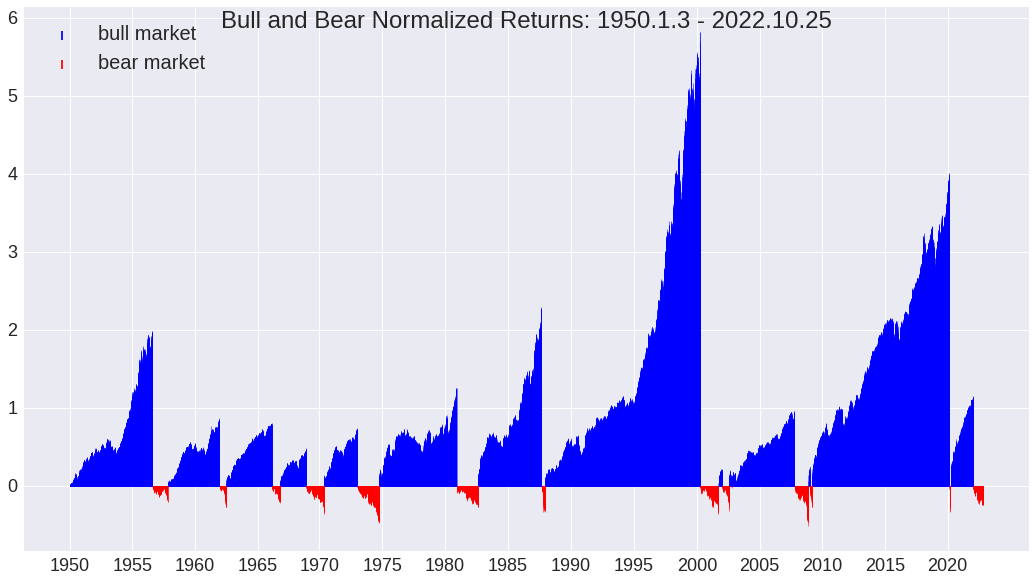

In [ ]:
%run fmplot

title=['Bull and Bear Normalized Returns']
variables=['mcnr']
fmplot(df_mc,variables,titles=title,
          plottypes='mktcycle', stemlw=0.5,legend_fontsize=20,xtick_labelsize=18,ytick_labelsize=18,
          titlein=True, titlexy=(0.5,0.95), figsize=(18,10),titledate=True, title_fontsize=24)

Figure 1. Bull and Bear market cycle plot.
From this graph, it is evident that characterizing the market cycles requires retroactive analysis.

For example, finding a Bear market (down-trending market), assuming we start during Bull upward trending (blue) market condition, starting from earlier dates to later dates, we identify a market-high close price. Initialize the market high to the close price corresponding to the first day of the current market cycle. Then, moving forward day-by-day, we monitor the close price relative to the market high until a new high is found or the market falls by 20% relative to the market high. On the day the market falls by 20% relative to the market high, a Bear market is detected. At this point, we go back (retroactively) and fill in the dates from the high to the present day and mark the days as mkt = -1. The market days before the high are marked as mkt = 1, corresponding to the Bull market. The Bear market starts on the next market day following the previous high. The mcnr variable is set equal to zero at the beginning of the Bear market cycle, and from that point forward to the present, indicates the percent decrease from the market high.

Similarly, once in a Bear market (downward trending market), a Bull market is detected when the market increases by greater than 20% relative to the market low. Once the market has increased by 20% from the market low, we go back (retroactively) and fill in the dates from the market low to the present day and mark the days as mkt = 1. The market days before the market low, from the previous market high, are marked as mkt = -1, corresponding to the Bull market. The mcnr variable is set equal to zero at the beginning of the Bull market cycle, and from that point forward to the present, indicates the percent increase from the market low.

# Recessions: Annotations and Fill-Between

It is useful to add additional information to the plot, especially to generate plots for documentation and presentations and for observing insights.

A typical addition is to show recessions. fmplot.py contains the get_recessions() function, which returns a list of recessions in the form of tuples (start date, end date). These are graphed using the fb (fill between) option.

Below, we create a list of text annotations with descriptive titles for the Bull and Bear cycles, and recessions. The list elements include a tuple with the corresponding x and y coordinate, corresponding to where the annotation will be placed on the graph, and a text string. The text string may contain a “\n” character to designate a line return.

In [ ]:
recessions = get_recessions()

In [ ]:
# Bear Market Annotations
# https://www.foxbusiness.com/markets/history-of-bear-markets-since-1929
# https://www.marottaonmoney.com/the-golden-bear-the-bear-market-of-1973/
# https://www.marottaonmoney.com/the-dot-com-bubble-the-bear-market-of-2001/
# http://www.nbcnews.com/id/37740147/ns/business-stocks_and_economy/t/historic-bear-markets/#.X1k--RPYrUI
bearannotations=[]
bearannotations.append((dt.datetime(1956,1,1),-1.1,'1956-57\nRed\nScare'))
bearannotations.append((dt.datetime(1961,1,1),-1.3,'1961-62\nSteel &\nTech\nCrash'))
bearannotations.append((dt.datetime(1965,4,1),-1.1,'1966\nCredit\nCrunch'))
bearannotations.append((dt.datetime(1969,4,1),-1.3,'1968-70\nDouble\nBottom\nBear'))
bearannotations.append((dt.datetime(1974,1,1),-1.1,'1973-74\nGolden\nBear'))
bearannotations.append((dt.datetime(1981,1,1),-1.1,'1980-82\nVolker\nBear'))
bearannotations.append((dt.datetime(1987,1,1),-1.1,'1987 Oct\nBlack\nMonday'))
bearannotations.append((dt.datetime(2000,1,1),-1.1,'2000-02\nDot Com\nBubble'))
bearannotations.append((dt.datetime(2007,1,1),-1.2,'2007-09\nFinancial\nCrisis'))
bearannotations.append((dt.datetime(2019,1,1),-1.1,'2020\nCOVID\nBear'))

# https://www.investopedia.com/articles/economics/08/past-recessions.asp
# Recession Annotations
recessionannotations=[]
recessionannotations.append((dt.datetime(1951,1,1),2.8,'1953-54\nPost\nKorean\nWar\nRecession','k'))
recessionannotations.append((dt.datetime(1956,1,1),3.8,'1957-58\nEisenhower\nRecession','k'))
recessionannotations.append((dt.datetime(1959,1,1),2.5,'1960-61\nRolling\nAdjustment\nRecession','k'))
recessionannotations.append((dt.datetime(1969,1,1),3.2,'1969-70\nNixon\nRecession','k'))
recessionannotations.append((dt.datetime(1973,1,1),2,'1973-75\nOil\nCrisis\nRecession','k'))
recessionannotations.append((dt.datetime(1978,1,1),3.8,'1980\nEnergy\nCrisis\nRecession','k'))
recessionannotations.append((dt.datetime(1981,1,1),2.5,'1981-82\nIran\nEnergy\nCrisis\nRecession','k'))
recessionannotations.append((dt.datetime(1990,1,1),2.8,'1990-91\nGulf\nWar\nRecession','k'))
recessionannotations.append((dt.datetime(2001,1,1),2.8,'2001\n9/11\nRecession','k'))
recessionannotations.append((dt.datetime(2007,1,1),2.8,'2007-09\nThe\nGreat\nRecession','k'))
recessionannotations.append((dt.datetime(2018,1,1),4.2,'2020\nCOVID-19\nRecession','k'))

The fmplot() function with fb and annotation options generates the classic Bear and Bull market cycle chart, including a display of recessions and descriptive text.

<Figure size 576x396 with 0 Axes>

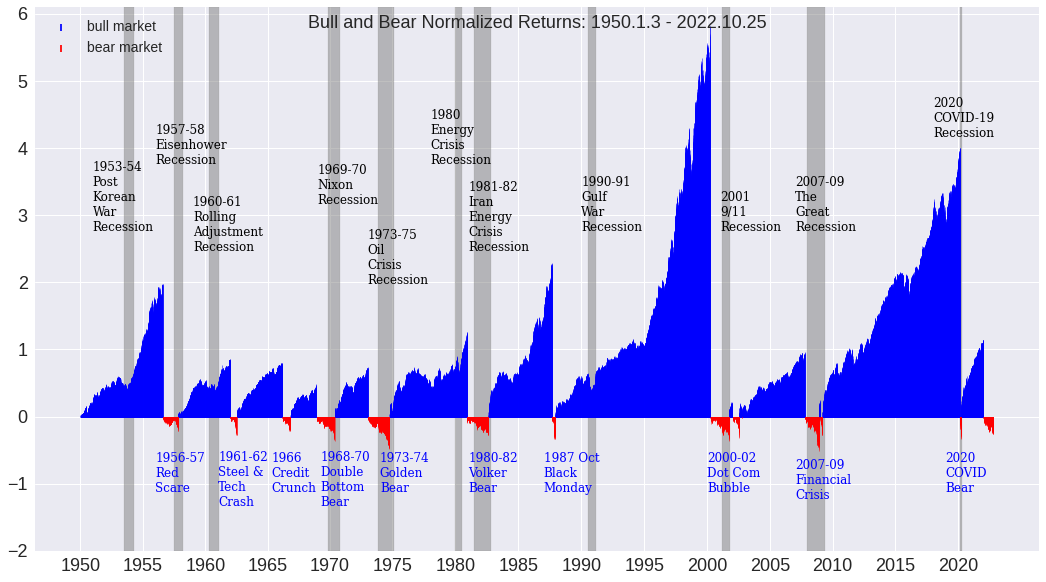

In [ ]:
%run fmplot


title=['Bull and Bear Normalized Returns']
variables=['mcnr']
fmplot(df_mc,variables,titles=title,fb=recessions,
          plottypes=['mktcycle'], stemlw=0.5, ylims=(-2,6.1), legend_fontsize=14,
          xtick_labelsize=18,ytick_labelsize=18,
          titlein=True, titlexy=(0.5,0.95), figsize=(18,10),titledate=True, title_fontsize=18,
          annotations=[bearannotations + recessionannotations])

Figure 2. Bull and Bear market plot with annotations.
Several insights result from this graph. Our objective here is not to deep dive into classic market analysis, but especially to make observations that will aid in designing a machine learning model.

  - The first most apparent observation is the cyclic behavior of the market. It tends to rise, upward trend line (blue) then goes into a downward trend (red), followed by a repetition of the cycle.
  - The upward trend’s length typically occurs for several years, wherein a growing market is the normal situation, but is interrupted by shorter length downward trends or crashes.
  - Recessions can occur without causing a market crash. For example, the Gulf War Recession or the post-Korean war recession occurred during Bull markets. Recessions tend to be reactionary to the market, rather than a leading indicator of the market. Often there are market crashes without recessions, and sometimes a recession follows a market crash.
  - We learn that often outside forces are the instigators of crashes. A case in point is the 2020 COVID Pandemic. The pandemic crisis had nothing to do with financial markets, but the effect due to social distancing strongly impacted the workforce and business operations across most industries.
  - In some cases, the same trends that are driving the market up are the ones that bring the market down. Such a case is the 2007 - 2009 Financial Crisis, where the U.S. housing market, sub-prime mortgage investments, drove the market up and then brought the market down with the collapse of the U.S. housing market.
  - In many cases, assets are overvalued and are termed asset bubbles. In such cases, certain metrics, for example, price-to-earnings ratio, increase significantly above historical levels leading to straightforward prediction. A case in point is the DoT Com Bubble, which led to unjustified multi-billion dollar valuations as companies went public. Looking at Figure 3, we observe it took from 2000 to late 2007 to regain the lost market value from the Dot Com Bubble.
  - The 1987 Black Monday Bear is a result of several outside influences including computerized trading, fears of the devaluation of the dollar, and military tensions with Iraq.
  - The 1980-82 Volker Bear is attributed to the Fed raising interest rates in order to slow inflation, but then making it difficult to borrow money contributing to a high employment rate and a market slow down.

From these observations, it is evident that outside factors have a strong influence on the market. In some cases, market downturns are due to world events such as military conflicts, world politics, and worldwide pandemics. In some cases new technologies such as computerized trading react quickly to cause a stock sell off with devastating effect. In other cases monetary decisions designed to be helpful have harmful side effects. To some degree, following each market crash new policies, practices, and corrections are adopted to prevent future crashes.

From all these observations, there are at least two general points for developing a market cycle prediction model.

  - a model will likely have to learn quickly as a new market situation develops.
  - additional data sources that capture the effects of external forces should be useful for predicting market downturns.

# Subplots with MktCycle and Line Plots

When analyzing variables and trends, it is useful to compare multiple market variables. For example, it is beneficial to examine the mcnr and compare it to the close price. Here we provide fmplot() a list of variables to be plotted along with a list of plot types. We also set hspace indicating a small amount of space between subplots, and set sharex = True for sharing the x-axis for all subplots.

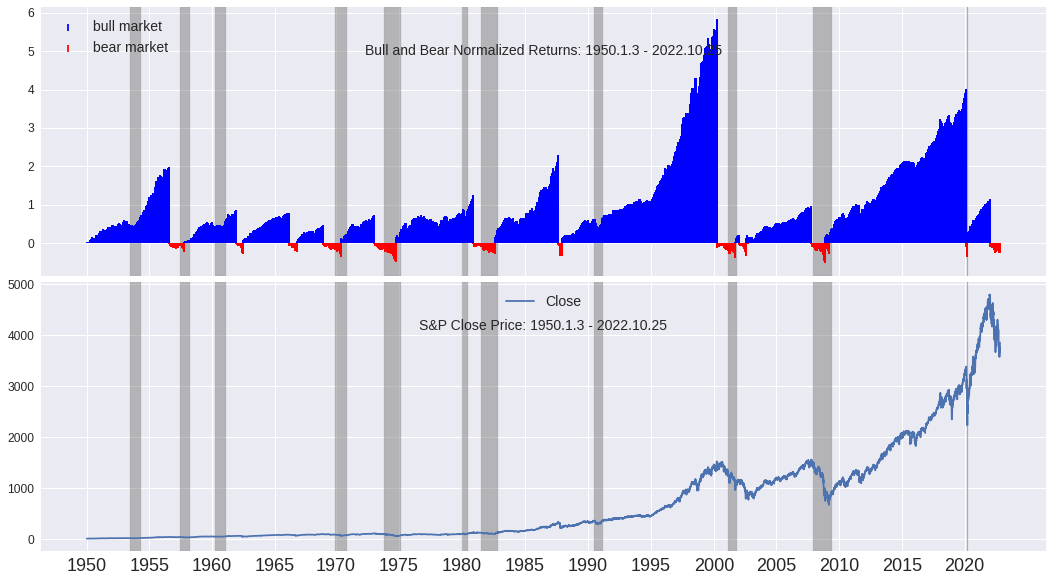

In [ ]:
title=['Bull and Bear Normalized Returns', 'S&P Close Price']
variables=['mcnr','Close']
fmplot(df_mc,variables,titles=title,stemlw=2,fb=recessions,
          plottypes=['mktcycle','line'],legend_fontsize=14,llocs=['upper left','best'],
          xtick_labelsize=18, hspace=0.025, sharex=True,titlein=True, figsize=(18,10),titledate=True)

# Zoom In

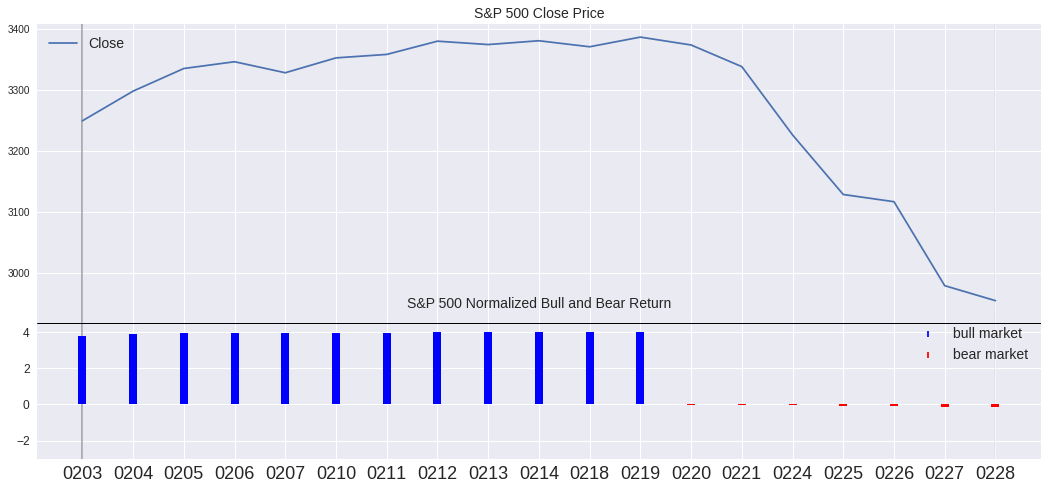

In [ ]:
# Plot S&P and Market Cycle
figsize=(18,8)
s=dt.datetime(2020,2,1)
e=dt.datetime(2020,3,1)

#print('dfmc1 last index =',dfmc1.index[len(dfmc2.index)-1])
titles=['S&P 500 Close Price','S&P 500 Normalized Bull and Bear Return']
variables=['Close','mcnr']
fmplot(df_mc,variables,startdate=s,enddate=e,legend_fontsize=14,
               plottypes=['line','mktcycle'],stemlw=8,llocs=['upper left','upper right'],
               figsize=figsize,fb=recessions,sharex=True, hspace=0,ylims=['',(-3,5)],xtick_labelsize=18,
               titles=titles,titlexy=[(0.5,0.9),(0.5,0.8)],height_ratios=[2,1],hlines =['',4.5])

# Machine Learning Variables
Several variables generated by fmcycle() are useful for creating a machine learning model of the market cycles. It is essential to understand which variables are appropriate for machine learning and which ones are not.

It is tempting to employ mkt variable as the target variable (dependent variable) in the training of the machine learning model. That is, a machine learning algorithm is trained to predict mkt. If a machine perfectly predicts this variable, it amounts to trading only when the market is in an upwardly trending condition (Bull market), and for example, when investing in an S&P500 index fund, results in very significant gains. Such a situation would result in “beating the market.” However, it should be remembered that the mkt signal is determined retroactively so its use as a target variable will inadvertently result in leakage of truth into the training algorithm.

Close, mucdown, mdcup, and mcupm are useful as machine learning features, meaning predictor variables, after proper normalization. These signals are described as follows.

  - Close - this variable is the daily market close price and will need to be properly normalized for use as a machine learning feature variable.
  - mcupm - This signal is generated by fmcycles() and marks the point in time when the market is in an up or down condition, without retroactive analysis. This signal is not perfectly aligned with mkt as seen in the graph. For example, the market is in a Bull upward trend condition, and a Bear market is not yet detected, so mcupm lags mkt.
  - mucdown - This signal is generated by fmcycles(). When in a Bull market condition, mucdown is the percent down from the previously detected market high.
  - mdcup - This signal is generated by fmcycles(). When in a Bear market condition, mdcup is the percent up form the previously detected low.

Some variables should not be used for machine learning. The mcnr variable, as described above, is derived by retroactively identifying the market condition. It must not be used for prediction, or “leakage” will occur. Leakage is when the dependent variable leaks back into the machine learning features. In such a case, the machine learning algorithm will unfairly learn and appear to work very well during the training phase, but it will usually perform less effectively in the real world prediction phase due to poor generalization.

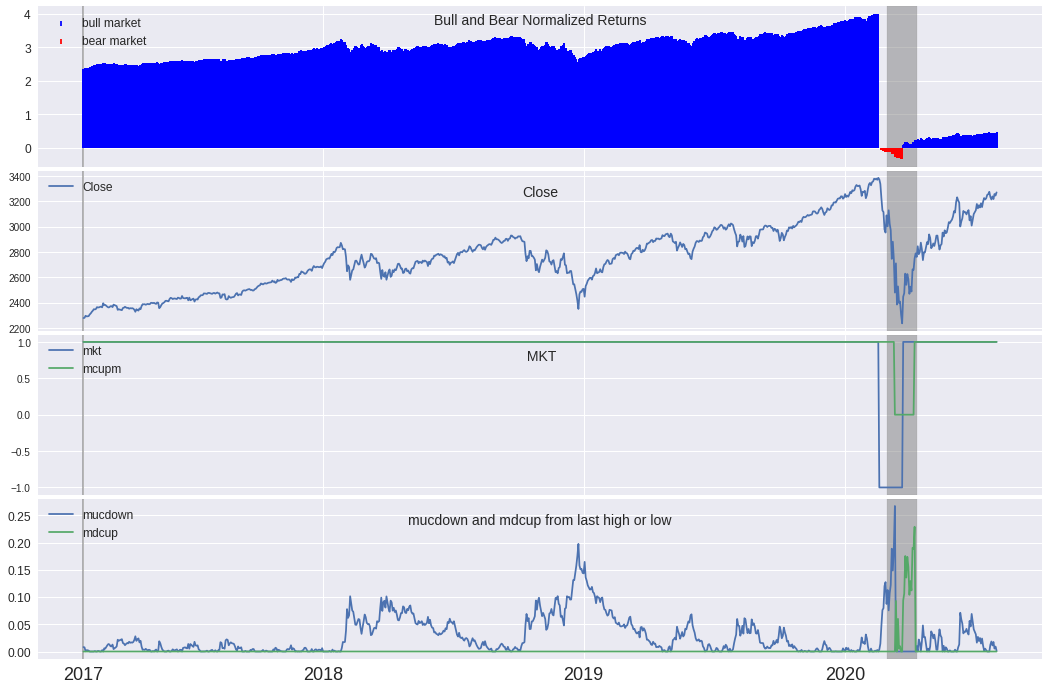

In [ ]:
startdate=dt.datetime(2017,2,1)
enddate=dt.datetime(2020,8,1)


title=['Bull and Bear Normalized Returns', 'Close',' MKT', 'mucdown and mdcup from last high or low']
variables=['mcnr','Close',['mkt','mcupm'],['mucdown','mdcup']]
fmplot(df_mc,variables,titles=title,startdate=startdate,enddate=enddate,stemlw=2,fb=recessions,
          plottypes=['mktcycle','line','line','line'],xtick_labelsize=18,
          hspace=0.025,sharex=True,titlein=True, titlexy=[(0.5,0.85),'','',''],
          figsize=(18,12))